<a href="https://colab.research.google.com/github/Obreintelly/Unsupervised_Learning_with_R/blob/main/Unsupervised_Learning_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
#We will be working with data tables thus we install data.table package

install.packages("data.table")

#We will need a data manipulation package

#install.packages("dplyr")

#We will also need to get a package to support visualizations and dataframe 
#operations including data cleaning
install.packages("tidyverse")

#Installing GGPLOT2 to support visualization
install.packages("ggplot2")

install.packages("DataExplorer") 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [132]:
#Loading the Libraries

library(data.table)

#library(dplyr)

library(tidyverse)

library(ggplot2)

library(DataExplorer)



# **Loading Dataset**

In [133]:
kira <- read.csv("http://bit.ly/EcommerceCustomersDataset")

# **Exploring Dataset**

In [134]:
#First 6 rows of dataset
head(kira)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [135]:
#Exploring last 6 rows
tail(kira)



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
12325,0,0,1,0,16,503.000,0.000000000,0.03764706,0.00000,0,Nov,2,2,1,1,Returning_Visitor,FALSE,FALSE
12326,3,145,0,0,53,1783.792,0.007142857,0.02903061,12.24172,0,Dec,4,6,1,1,Returning_Visitor,TRUE,FALSE
12327,0,0,0,0,5,465.750,0.000000000,0.02133333,0.00000,0,Nov,3,2,1,8,Returning_Visitor,TRUE,FALSE
12328,0,0,0,0,6,184.250,0.083333333,0.08666667,0.00000,0,Nov,3,2,1,13,Returning_Visitor,TRUE,FALSE
12329,4,75,0,0,15,346.000,0.000000000,0.02105263,0.00000,0,Nov,2,2,3,11,Returning_Visitor,FALSE,FALSE
12330,0,0,0,0,3,21.250,0.000000000,0.06666667,0.00000,0,Nov,3,2,1,2,New_Visitor,TRUE,FALSE


In [136]:
#Checking size of Dataset

dim(kira)

[1] 12330    18

In [137]:
#Checking Columns

colnames(kira)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"

In [138]:
#Checking Structure of the Dataset
str(kira)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : chr  "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : chr  "Returning_Visitor" "Returning_Visitor" "Returning

In [139]:
#Checking unique values in the dataset
unique(kira$OperatingSystems)

[1] 1 2 4 3 7 6 8 5

In [140]:
#Checking for Unique Values in Browser
unique(kira$Browser)

[1]  1  2  3  4  5  6  7 10  8  9 12 13 11

In [141]:
#Checking unique values in the Month column to ensure in line with expectations
unique(kira$Month)

[1] "Feb"  "Mar"  "May"  "Oct"  "June" "Jul"  "Aug"  "Nov"  "Sep"  "Dec"

In [142]:
#Unique values in Informational Column
unique(kira$Informational)

[1]  0  1  2  4 16  5  3 14  6 12  7 NA  9 10  8 11 24 13

In [143]:
unique(kira$Administrative_Duration)

[1]    0.000000   -1.000000   53.000000   64.600000    6.000000   18.000000
   [7]    9.000000   56.000000   16.000000  279.416667   87.833333   44.000000
  [13] 1005.666667   36.000000   18.333333   61.000000   31.000000   58.500000
  [19]  326.250000   22.000000  462.000000   20.000000  111.500000  103.625000
  [25]   19.000000   58.000000    9.500000   41.300000   87.000000  293.778205
  [31]   47.000000 1226.000000   52.000000  112.960784   94.000000   32.000000
  [37]  218.000000  119.000000  281.000000   40.000000  107.000000   49.000000
  [43]   57.000000    2.000000  123.000000  118.000000   38.000000   54.000000
  [49]  993.000000   74.250000  666.833333   73.000000  154.000000   49.333333
  [55]  118.500000  153.500000   72.250000   24.500000  155.631313   21.333333
  [61]  191.000000   96.500000   13.000000 1388.750000   51.000000  158.000000
  [67]   10.000000   28.000000   27.000000   15.000000 1249.809524  390.000000
  [73]  215.523809   11.000000    8.000000  171.250000  227.333333   86.000000
  [79]    7.000000  186.976191  138.000000  374.000000   14.000000   96.000000
  [85]  615.250000  111.000000  147.000000   53.166667   48.500000   21.000000
  [91]  115.333333   32.285714  277.750000  241.166667   64.000000   25.500000
  [97]  130.000000   79.000000   84.000000   41.000000  618.000000   11.888889
 [103]   51.500000  269.000000   44.500000    3.000000   90.000000  102.500000
 [109]   17.000000  213.321429   71.500000  304.000000  151.000000  199.750000
 [115]   13.500000  191.200000  197.000000  115.125000  312.750000  724.000000
 [121]  237.500000   66.333333  190.000000  174.000000  227.000000   23.000000
 [127]   26.000000   74.000000   45.000000  112.000000   37.000000    5.500000
 [133]   50.000000  113.500000  279.000000  228.000000   55.000000  112.500000
 [139]    8.500000  319.500000   97.500000  182.083333   97.000000   34.833333
 [145]   77.000000  614.166667  315.966667   47.666667   30.000000   25.000000
 [151]  359.000000   59.000000 1347.750000  280.950000  100.300000   53.380952
 [157]  416.392857  573.500000  465.833333   97.642857  148.000000   97.611111
 [163]   34.000000   37.500000   22.500000   99.333333  117.000000   16.666667
 [169]   81.500000   38.500000  156.250000   67.500000  311.409091  145.000000
 [175]   43.000000  120.000000  263.000000   72.944444   18.500000   87.333333
 [181]   99.605882   63.000000   68.000000   68.500000  135.000000  176.250000
 [187]  315.144986  523.214286   76.000000  118.666667  174.500000  201.166667
 [193]  374.875000   92.833333    4.000000  102.000000  187.000000  185.000000
 [199]  166.200000  754.109524   24.000000   17.348485  125.500000   42.000000
 [205]   95.000000   56.500000  134.928571   20.500000   11.333333  504.000000
 [211]   19.666667   76.333333   45.444444  125.166667   72.666667  100.916667
 [217]   60.000000   49.500000  466.500000  175.230769   96.857143  402.185714
 [223]  178.200000  156.500000  306.000000   72.000000  202.000000  359.300000
 [229]   39.000000   41.500000   95.500000   48.666667  294.700000  125.000000
 [235]   12.000000   10.500000   99.000000  171.083333  159.500000    5.000000
 [241]  206.000000  262.250000   62.500000  937.174603   48.000000  437.391304
 [247]  159.333333   32.500000  212.741667   16.333333  140.500000   88.000000
 [253]  110.409091  316.140503  140.000000  301.700000  421.000000  115.000000
 [259]  208.000000  193.000000   87.500000   42.181818  132.500000  163.666667
 [265]   83.000000  117.833333   55.500000  160.500000   64.333333   73.333333
 [271]  215.233333  201.500000  492.416667  146.250000  156.269048   13.619048
 [277]  352.500000   92.750000  168.000000  179.500000  274.500000   64.500000
 [283]  171.666667  311.916667   98.500000  867.922619  106.750000  241.666667
 [289]   35.000000   33.000000  152.500000  828.052632  162.000000  539.500000
 [295]  120.500000  285.011905  198.500000  224.000000  162.500000   77.500000
 [301]  192.500000  148.800000 1521.000000  112.26666

In [144]:
unique(kira$Administrative)

[1]  0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 NA 24 22 21 20
[26] 23 27 26

In [145]:
unique(kira$BounceRates)

[1] 0.200000000 0.000000000 0.050000000 0.020000000 0.015789474 0.018750000
   [7] 0.008333333 0.002857143 0.043478261 0.040000000 0.014285714 0.015384615
  [13] 0.025000000 0.028571429 0.003030303 0.017142857 0.066666667 0.011111111
  [19] 0.011764706 0.009000000 0.002150538 0.004347826 0.016666667 0.057142857
  [25] 0.003703704 0.038095238 0.004166667 0.007058824 0.150000000 0.044444444
  [31] 0.000854701 0.008000000 0.012903226 0.018181818 0.028000000 0.133333333
  [37] 0.005555556 0.007142857 0.007500000 0.100000000 0.033333333 0.008695652
  [43] 0.030303030 0.015217391 0.086666667 0.010743802 0.003174603 0.001960784
  [49] 0.036190476 0.009090909 0.002061856 0.013068182 0.037619048 0.006666667
  [55] 0.005714286 0.080000000 0.001481481 0.010526316 0.004000000 0.005263158
  [61] 0.006896552 0.011578947 0.022807018 0.023529412 0.005000000 0.012676056
  [67] 0.007246377 0.010000000 0.015555556 0.006451613 0.035714286 0.014583333
  [73] 0.010638298 0.011428571 0.010588235 0.013500000 0.004545455 0.012571429
  [79] 0.013793103 0.022916667 0.005128205 0.013333333 0.003076923 0.002631579
  [85] 0.027083333 0.000098300 0.014814815 0.013888889 0.008897485 0.005333333
  [91] 0.011200000 0.019047619 0.009929078 0.015625000 0.004081633 0.004255319
  [97] 0.003508772 0.005405405 0.022222222 0.003870968 0.075000000 0.002197802
 [103] 0.003571429 0.030000000 0.012500000 0.026666667 0.077777778 0.020512821
 [109] 0.017105263 0.013636364 0.030769231 0.007407407 0.019871795 0.003333333
 [115] 0.007692308 0.028787879 0.005882353 0.023076923 0.038461538 0.009523810
 [121] 0.001298701 0.005797101 0.036363636 0.006635802 0.032727273 0.041666667
 [127] 0.006250000 0.045454545 0.012962963 0.002531328 0.003846154 0.004761905
 [133] 0.002105263 0.002666667 0.003448276 0.000606061 0.004444444 0.055555556
 [139] 0.002439024 0.002469136 0.031932773 0.001666667 0.003673469 0.006060606
 [145] 0.001694915 0.006944444 0.002531646 0.085714286 0.001818182 0.003214696
 [151] 0.011529933 0.001360544 0.007894737 0.024561404 0.000308642 0.000833333
 [157] 0.001098901 0.012121212 0.005952381 0.013675214 0.061538462 0.015686275
 [163] 0.000563380 0.024242424 0.000668896 0.005660377 0.064285714 0.000980392
 [169] 0.004489796 0.010256410 0.007258065 0.003205128 0.016216216 0.016326531
 [175] 0.002272727 0.021052632 0.016000000 0.010869565 0.002941176 0.000892857
 [181] 0.003478261 0.010909091 0.037500000 0.019354839 0.006315789 0.006818182
 [187] 0.003361345 0.003125000 0.001030928 0.011965812 0.004848485 0.021621622
 [193] 0.007967033 0.006470588 0.008928571 0.029629630          NA 0.001333333
 [199] 0.007843137 0.001190476 0.019393939 0.083333333 0.003301887 0.036842105
 [205] 0.031578947 0.006153846 0.002564103 0.017647059 0.019444444 0.003389831
 [211] 0.000751880 0.036000000 0.003070175 0.007272727 0.027586207 0.001562500
 [217] 0.031818182 0.002985075 0.045833333 0.146666667 0.006334842 0.120000000
 [223] 0.026388889 0.012698413 0.003773585 0.001315789 0.161904762 0.004117063
 [229] 0.013008130 0.009032258 0.000374532 0.001724138 0.018055556 0.005172414
 [235] 0.001550388 0.020689655 0.021276596 0.002699055 0.014634146 0.002930403
 [241] 0.001230769 0.000297619 0.038596491 0.002898551 0.004878049 0.000123762
 [247] 0.001379310 0.002636535 0.042857143 0.032258065 0.034782609 0.060000000
 [253] 0.009850746 0.015995116 0.010810811 0.014141414 0.069230769 0.007777778
 [259] 0.008087680 0.014009662 0.023809524 0.046153846 0.004242424 0.000555556
 [265] 0.011461988 0.001780415 0.012727273 0.031111111 0.140000000 0.001754386
 [271] 0.047058824 0.007017544 0.014184397 0.010989011 0.012280702 0.008888889
 [277] 0.008943089 0.002000000 0.011714286 0.005310734 0.001142857 0.071428571
 [283] 0.002222222 0.004123711 0.002040816 0.155555556 0.011512297 0.009172260
 [289] 0.008357771 0.003636364 0.006097561 0.005500000 0.015000000 0.011827957
 [295] 0.072108844 0.018604651 0.062500000 0.070588235 0.005816216 0.013580247
 [301] 0.004909561 0.018787879 0.003954802 0.00630630

In [146]:
unique(kira$ExitRates)

[1] 0.200000000 0.100000000 0.140000000 0.050000000 0.024561404 0.022222222
   [7] 0.066666667 0.025833333 0.028571429 0.016312636 0.007692308 0.010000000
  [13] 0.008333333 0.033333333 0.040000000 0.009523810 0.050821256 0.025000000
  [19] 0.080000000 0.020352564 0.056250000 0.071428571 0.001794872 0.006666667
  [25] 0.006060606 0.057142857 0.133333333 0.003636364 0.026111111 0.075000000
  [31] 0.014736467 0.046568627 0.016666667 0.120833333 0.019666667 0.007142857
  [37] 0.012643678 0.015013034 0.007407407 0.052500000 0.012500000 0.014492754
  [43] 0.020000000 0.058333333 0.085714286 0.023809524 0.007894737 0.011764706
  [49] 0.015384615 0.025925926 0.080952381 0.031666667 0.008947368 0.026984127
  [55] 0.013510250 0.017647059 0.150000000 0.074074074 0.017918470 0.024000000
  [61] 0.035483871 0.005555556 0.012962963 0.027272727 0.111111111 0.034375000
  [67] 0.119523810 0.040740741 0.007547170 0.166666667 0.011111111 0.018518519
  [73] 0.046296296 0.018039216 0.011851852 0.009090909 0.030357143 0.028166667
  [79] 0.026315789 0.026666667 0.049930810 0.018840580 0.040606061 0.012463768
  [85] 0.011594203 0.063636364 0.014500000 0.019166667 0.008602151 0.014285714
  [91] 0.047002635 0.012764202 0.027248677 0.006339869 0.013509414 0.020708874
  [97] 0.016727891 0.096000000 0.057662338 0.010173465 0.005797101 0.061406250
 [103] 0.001666667 0.001724138 0.004000000 0.004166667 0.088888889 0.005263158
 [109] 0.043750000 0.037500000 0.049523810 0.042857143 0.013333333 0.120000000
 [115] 0.009150327 0.006578947 0.021052632 0.020666667 0.014666667 0.019230769
 [121] 0.044210526 0.014081633 0.010600255 0.032225685 0.036550087 0.031818182
 [127] 0.046470588 0.030833333 0.019354839 0.041025641 0.048148148 0.018052760
 [133] 0.015201207 0.022253906 0.025666667 0.010370370 0.033862434 0.018709677
 [139] 0.003329865 0.011666667 0.033846154 0.053571429 0.004545455 0.039583333
 [145] 0.026186255 0.044444444 0.038095238 0.024761905 0.007722385 0.022643039
 [151] 0.037476190 0.022424242 0.031907308 0.002272727 0.044761905 0.025555556
 [157] 0.016000000 0.028965517 0.110000000 0.014814815 0.008681765 0.009696970
 [163] 0.038373016 0.016410256 0.000175593 0.003571429 0.002222222 0.023611111
 [169] 0.009213675 0.017324561 0.019047619 0.011904762 0.005057471 0.125000000
 [175] 0.037333333 0.008000000 0.021367521 0.009876543 0.006250000 0.004371585
 [181] 0.003333333 0.028030303 0.047905093 0.053846154 0.009438427 0.030452675
 [187] 0.027742165 0.029431012 0.010588235 0.033504762 0.034933333 0.014000000
 [193] 0.020655014 0.061688312 0.035000000 0.019797366 0.029870130 0.051562500
 [199] 0.006501458 0.020644542 0.013342491 0.008695652 0.020449173 0.014259259
 [205] 0.016250000 0.008108108 0.010526316 0.001709402 0.019540230 0.017543860
 [211] 0.018918919 0.055555556 0.007285123 0.003846154 0.040444444 0.018181818
 [217] 0.002903226 0.037894737 0.046153846 0.037765568 0.019314286 0.053333333
 [223] 0.036507937 0.036000000 0.006451613 0.055000000 0.059846154 0.046666667
 [229] 0.039247312 0.116666667 0.035897436 0.021666667 0.008510638 0.019871795
 [235] 0.032380952 0.047105263 0.034848485 0.076923077 0.035714286 0.040476190
 [241] 0.090000000 0.070000000 0.014008551 0.017259740 0.010493827 0.038461538
 [247] 0.013793103 0.047348485 0.007425380 0.020602653 0.003174603 0.014705882
 [253] 0.013043478 0.036410256 0.058577534 0.021212121 0.072222222 0.014634146
 [259] 0.045833333 0.001190476 0.018965517 0.003703704 0.014035088 0.023983740
 [265] 0.039924242 0.017153855 0.072727273 0.054545455 0.016500000 0.003500000
 [271] 0.022500000 0.031250000 0.004308390 0.027174712 0.053273810 0.002380952
 [277] 0.007051282 0.023619048 0.041176471 0.030952381 0.020233586 0.035397453
 [283] 0.056666667 0.081818182 0.009683372 0.007618770 0.001137980 0.033262108
 [289] 0.010737154 0.014903846 0.009543860 0.002343750 0.015333333 0.018750000
 [295] 0.004444444 0.023529412 0.029687500 0.027586207 0.011616162 0.047619048
 [301] 0.031196581 0.032271242 0.008888889 0.02647907

In [147]:
unique(kira$Region)

[1] 1 9 2 3 4 5 6 7 8

In [148]:
unique(kira$VisitorType)

[1] "Returning_Visitor" "New_Visitor"       "Other"

In [149]:
unique(kira$Weekend)

[1] FALSE  TRUE

In [150]:
unique(kira$TrafficType)

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20

In [151]:
unique(kira$SpecialDay)

[1] 0.0 0.4 0.8 1.0 0.2 0.6

In [152]:
unique(kira$ProductRelated)

[1]   1   2  10  19   3  16   7   6  23  13  20   8   5  32   4  45  14  52
 [19]   9  46  15  22  11  12  36  42  27  90  18  38  17 128  25  30  21  51
 [37]  26  28  31  24  50  96  49  68  98  67  55  35  37  29  34  71  63  87
 [55]  40  33  54  64  75  39 111  81  61  47  44  88 149  41   0  79  66  43
 [73] 258  80  62  83 173  48  58  57  56  69  82  59 109 287  53  84  78 137
 [91] 113  89  65  60  NA 104 129  77  74  93  76  72 194 140 110 132 115  73
[109] 328 160  86 150  95 130 151 117 124 127 125 116 105  92 157 154 220 187
[127] 112 131 159  94 204 142 206 102 313 145  85  97 198 181 126 106 101 108
[145] 119  70 122  91 276 100 291 114 172 217 141 133 156 136 180 135 195  99
[163] 362 179 118 175 148 440 103 178 184 705 134 176 146 189 120 193 222 121
[181] 107 305 199 439 223 230 280 377 310 158 486 153 139 182 221 229 216 170
[199] 202 346 274 240 162 123 211 227 168 161 429 686 167 518 256 255 358 213
[217] 191 282 155 138 246 237 271 171 414 219 262 409 243 241 197 449 143 188
[235] 391 238 152 165 293 174 584 164 311 340 250 200 385 292 232 251 517 225
[253] 169 309 235 501 224 275 318 144 397 343 245 186 337 351 166 349 423 359
[271] 163 147 264 312 226 324 266 260 338 272 534 470 207 218 326 190 304 205
[289] 233 401 177 330 286 247 357 315 231 339 283 374 248 279 281 234 261 290
[307] 336 378 254 183 210 192

In [153]:
#Deriving Categorical columns
cat = kira[, 10:18]


In [154]:
#Deriving Numerical Columns from the dataset

num.cols <- sapply(kira, is.numeric)
num.cols

Administrative Administrative_Duration           Informational 
                   TRUE                    TRUE                    TRUE 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                   TRUE                    TRUE                    TRUE 
            BounceRates               ExitRates              PageValues 
                   TRUE                    TRUE                    TRUE 
             SpecialDay                   Month        OperatingSystems 
                   TRUE                   FALSE                    TRUE 
                Browser                  Region             TrafficType 
                   TRUE                    TRUE                    TRUE 
            VisitorType                 Weekend                 Revenue 
                  FALSE                   FALSE                   FALSE

In [155]:
numerical = kira[, 1:9]

# **Data Cleaning**

In [156]:
#Checking for Duplicates

any(duplicated(kira))

[1] TRUE

In [157]:
#There are no duplicates in the dataset
sum(duplicated(kira))

[1] 119

In [158]:
#Removing Duplicated Rows
kira <- kira[!duplicated(kira), ]

#Confirming there are no duplicates in the dataset
any(duplicated(kira))

[1] FALSE

In [159]:
#Checking for Missing Calues

any(is.na(kira))

[1] TRUE

In [160]:
#Total Missing values
sum(is.na(kira))

[1] 96

In [161]:
#Columns with Missing values
names(which(colSums(is.na(kira)) > 0))

[1] "Administrative"          "Administrative_Duration"
[3] "Informational"           "Informational_Duration" 
[5] "ProductRelated"          "ProductRelated_Duration"
[7] "BounceRates"             "ExitRates"

In [162]:
#Columns with Missing Values
colSums(is.na(kira))

Administrative Administrative_Duration           Informational 
                     12                      12                      12 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     12                      12                      12 
            BounceRates               ExitRates              PageValues 
                     12                      12                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

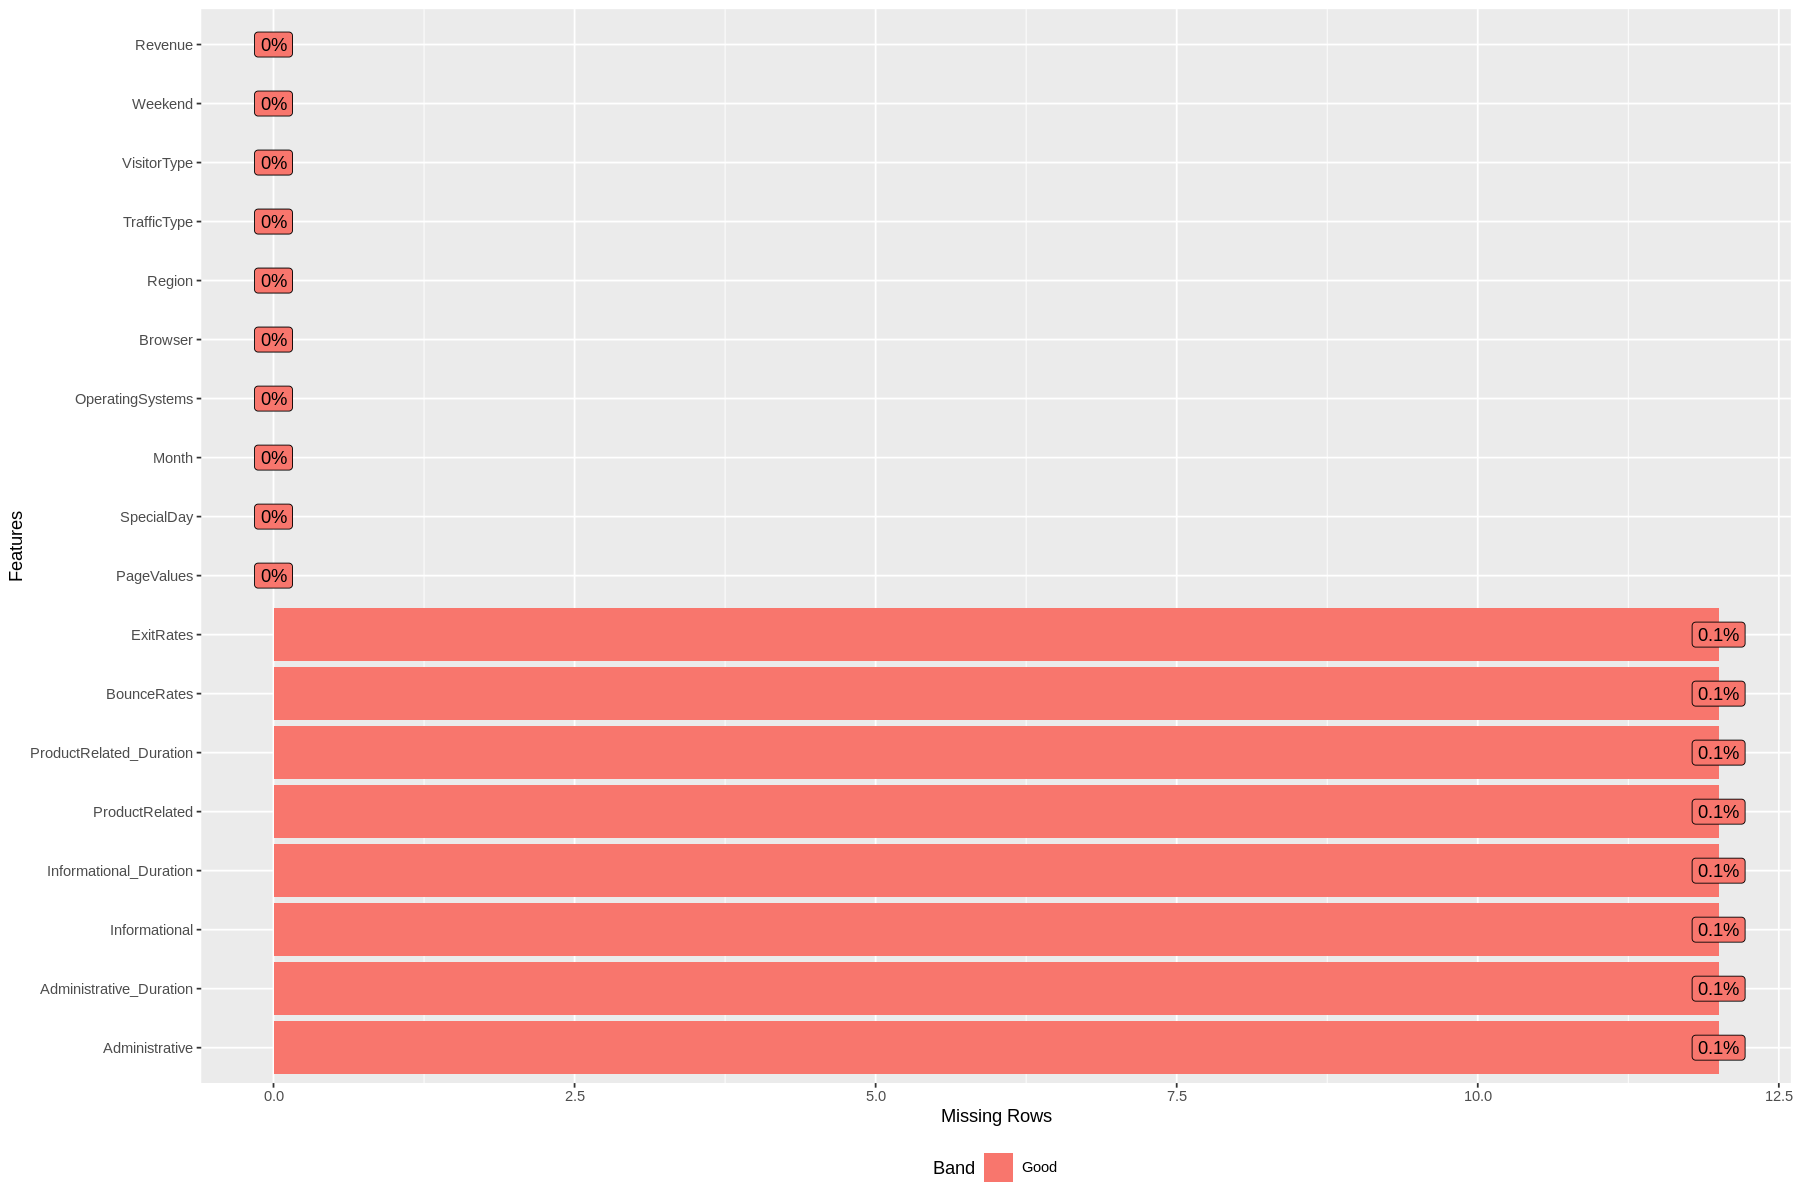

In [163]:
#Plot and Distribution of Missing values
plot_missing(kira)

We observe the percentage of missing values is not substantial to impact the analysis of the dataset should we decide to omit the missing values. 

In [164]:
#Filling missing values with mean values of the columns
kira  = kira %>%

mutate(ExitRates = replace(ExitRates, is.na(ExitRates), mean(ExitRates, na.rm = TRUE)))%>%
    mutate(BounceRates =replace(BounceRates, is.na(BounceRates),mean(BounceRates,na.rm=TRUE)))%>%
    mutate(Informational = replace(Informational, is.na(Informational), mean(Informational, na.rm = TRUE)))%>%
    mutate(Informational_Duration =replace(Informational_Duration,is.na(Informational_Duration),mean(Informational_Duration,na.rm=TRUE)))%>%
    mutate(ProductRelated =replace(ProductRelated,is.na(ProductRelated),mean(ProductRelated,na.rm=TRUE)))%>%
    mutate(ProductRelated_Duration = replace(ProductRelated_Duration, is.na(ProductRelated_Duration), mean(ProductRelated_Duration, na.rm = TRUE)))%>%
    mutate(Administrative_Duration =replace(Administrative_Duration,is.na(Administrative_Duration),mean(Administrative_Duration,na.rm=TRUE)))%>%
    mutate(Administrative =replace(Administrative,is.na(Administrative),mean(Administrative,na.rm=TRUE)))

In [165]:
#Checking for Missing Calues

any(is.na(kira))

[1] FALSE

# **Dealing with Outliers**

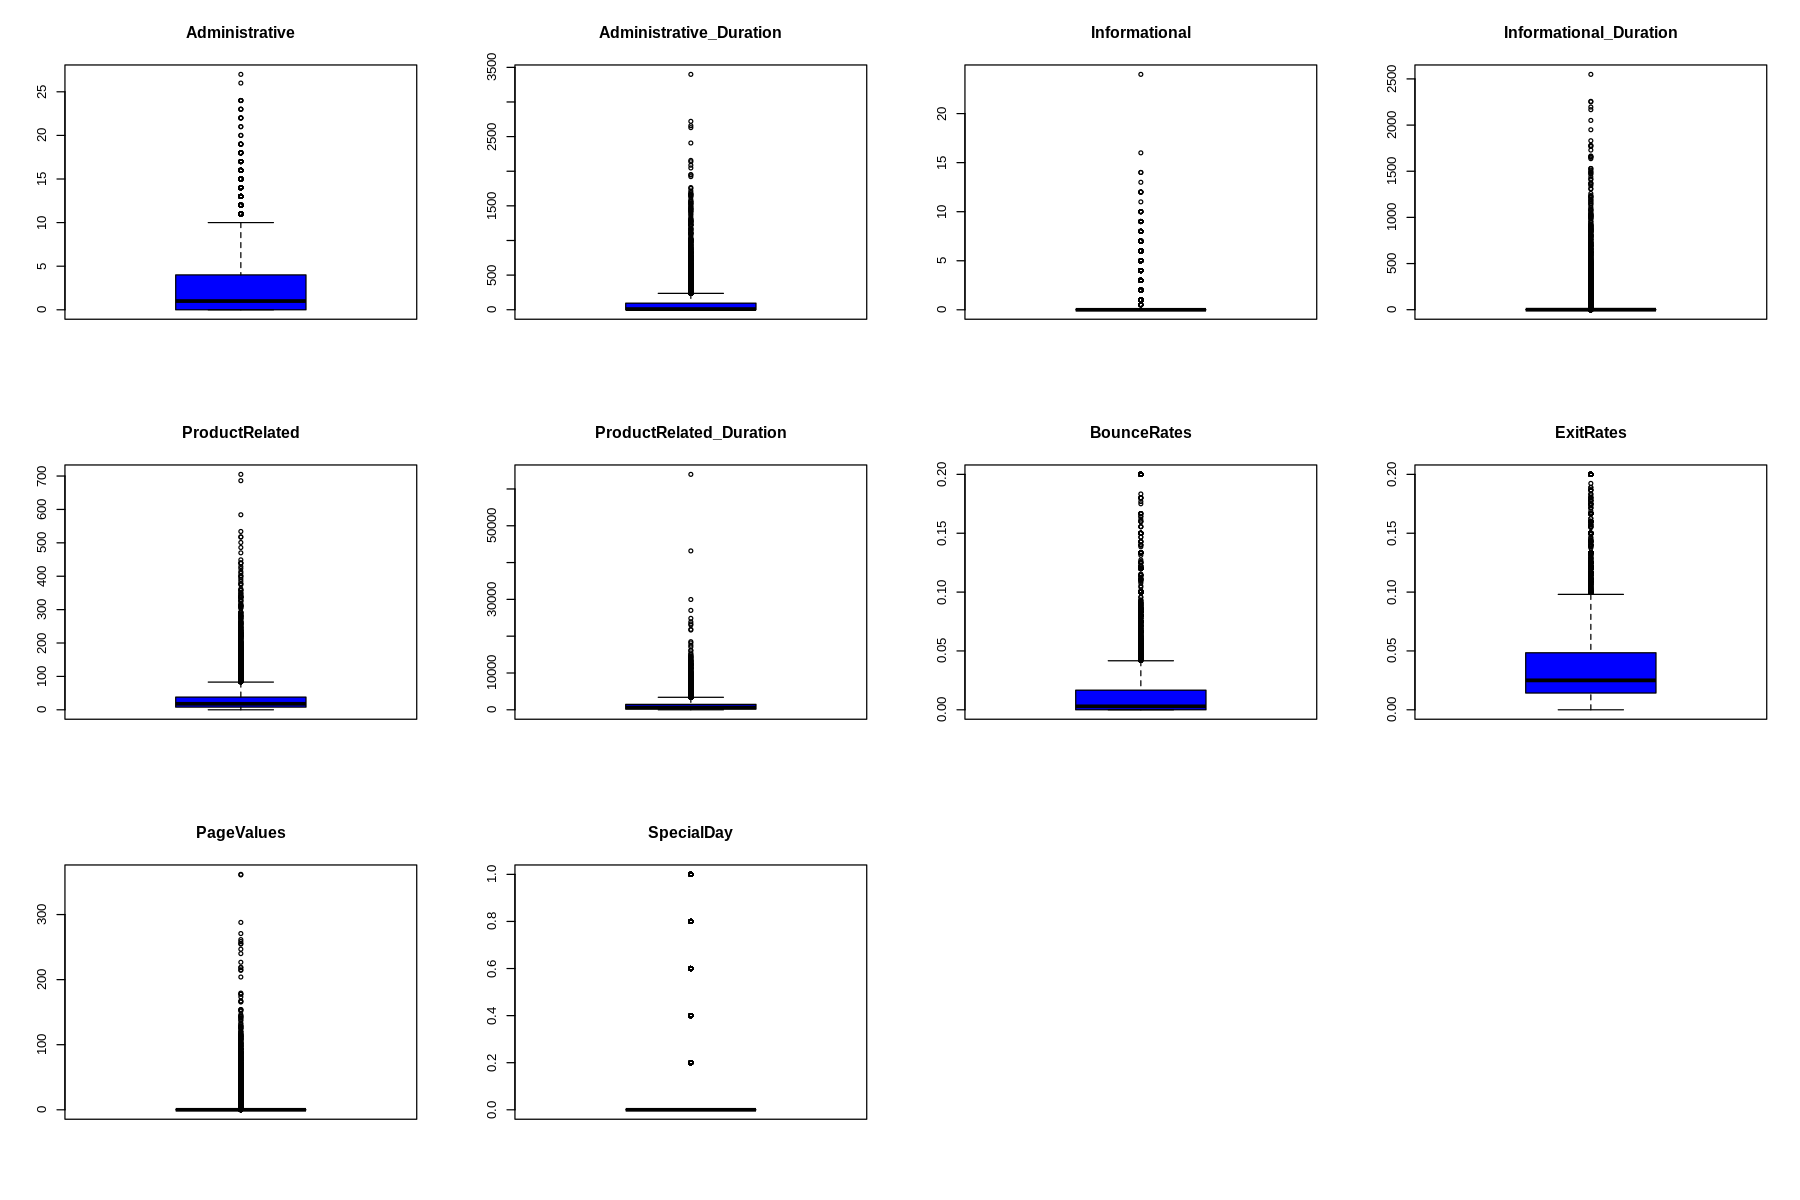

In [166]:
#Outlier Detection
par(mfrow=c(3,4))
for(i in 1:10) {
	boxplot(kira[,i], main=names(kira)[i], col = "blue")}

ALthough it is evident we have missing values in the dataset, we make the decision not to remove them as they represent actual data points and there is no special reason of removing them. 

# **Exploratory Data Analysis**

In [167]:
#Summary Statistic of Numerical Variables
summary(numerical)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

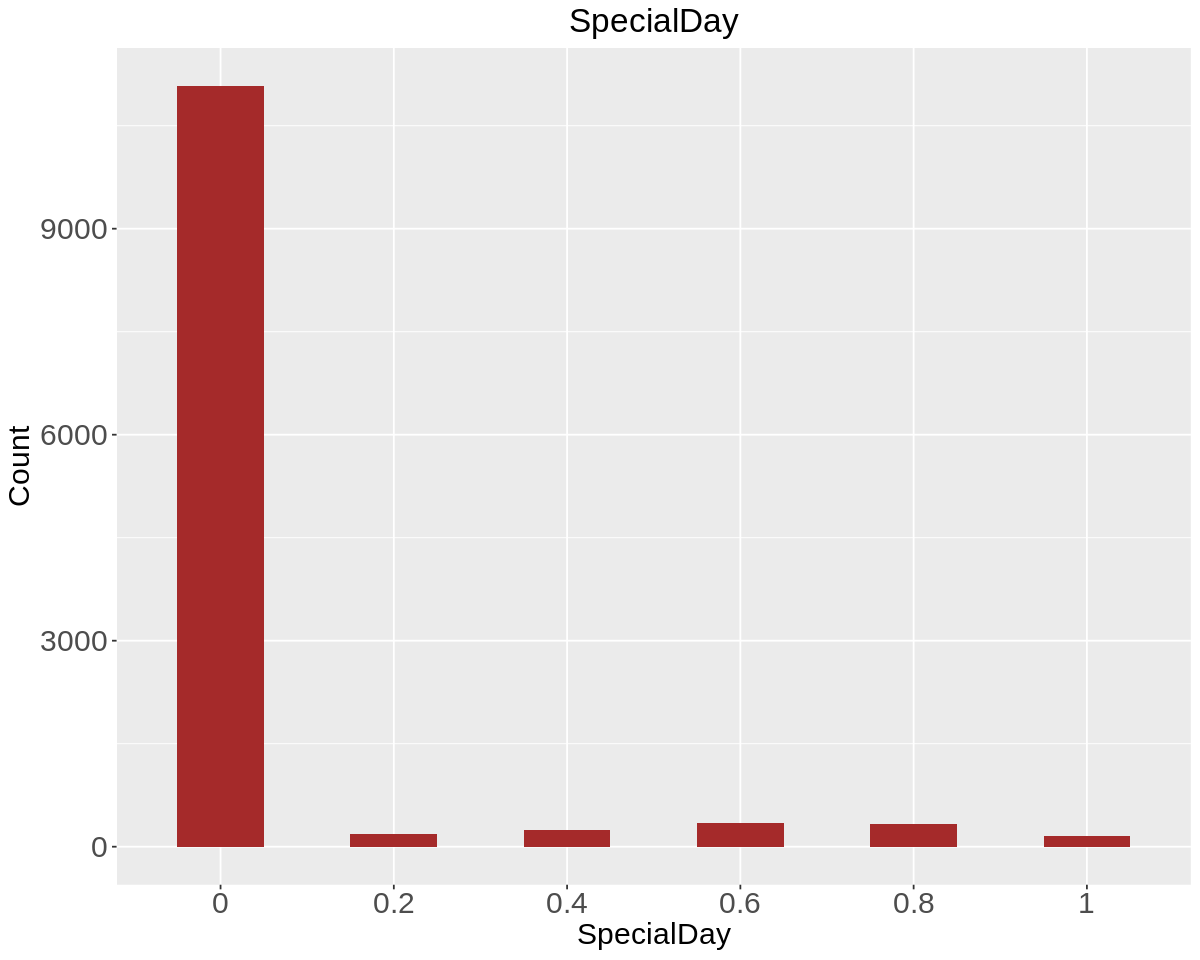

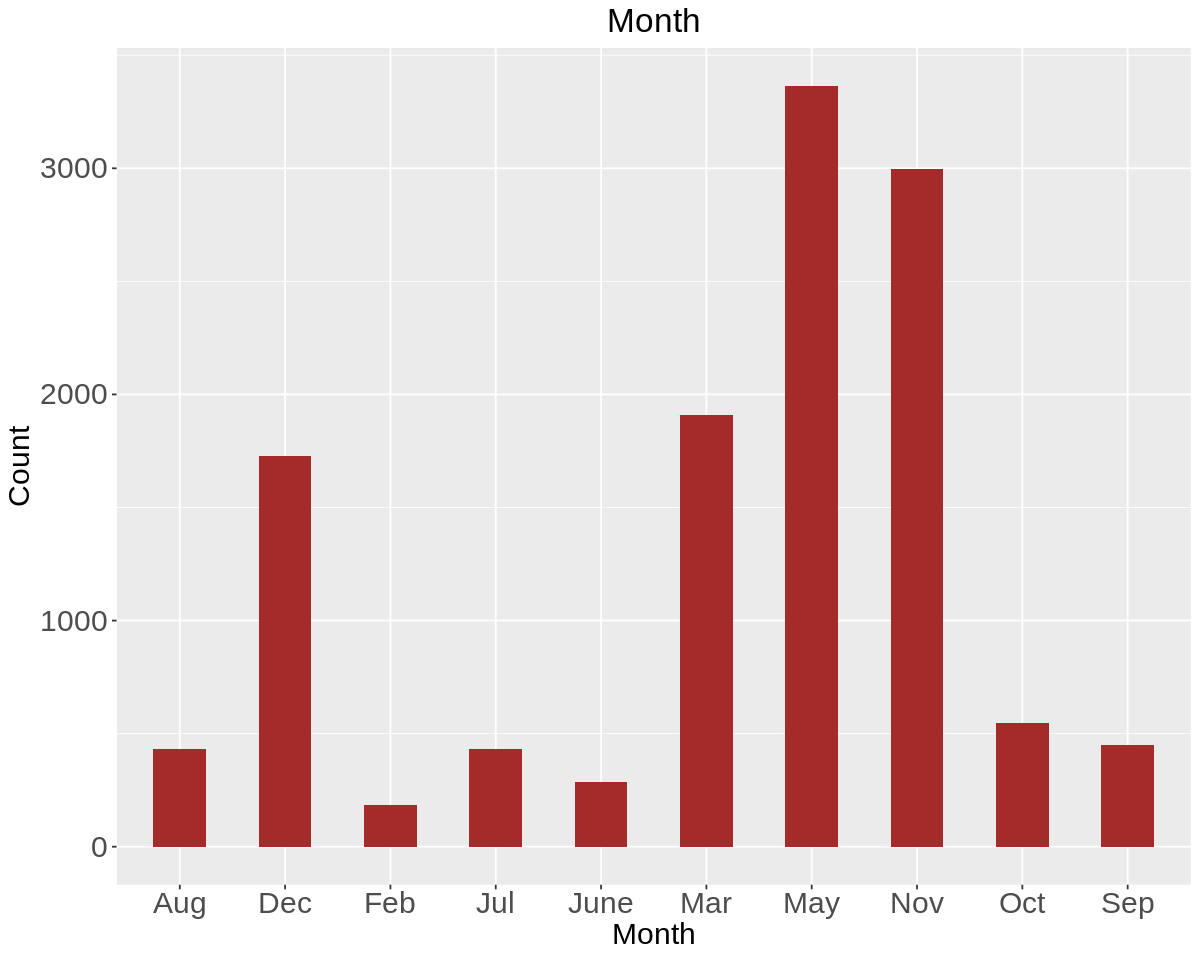

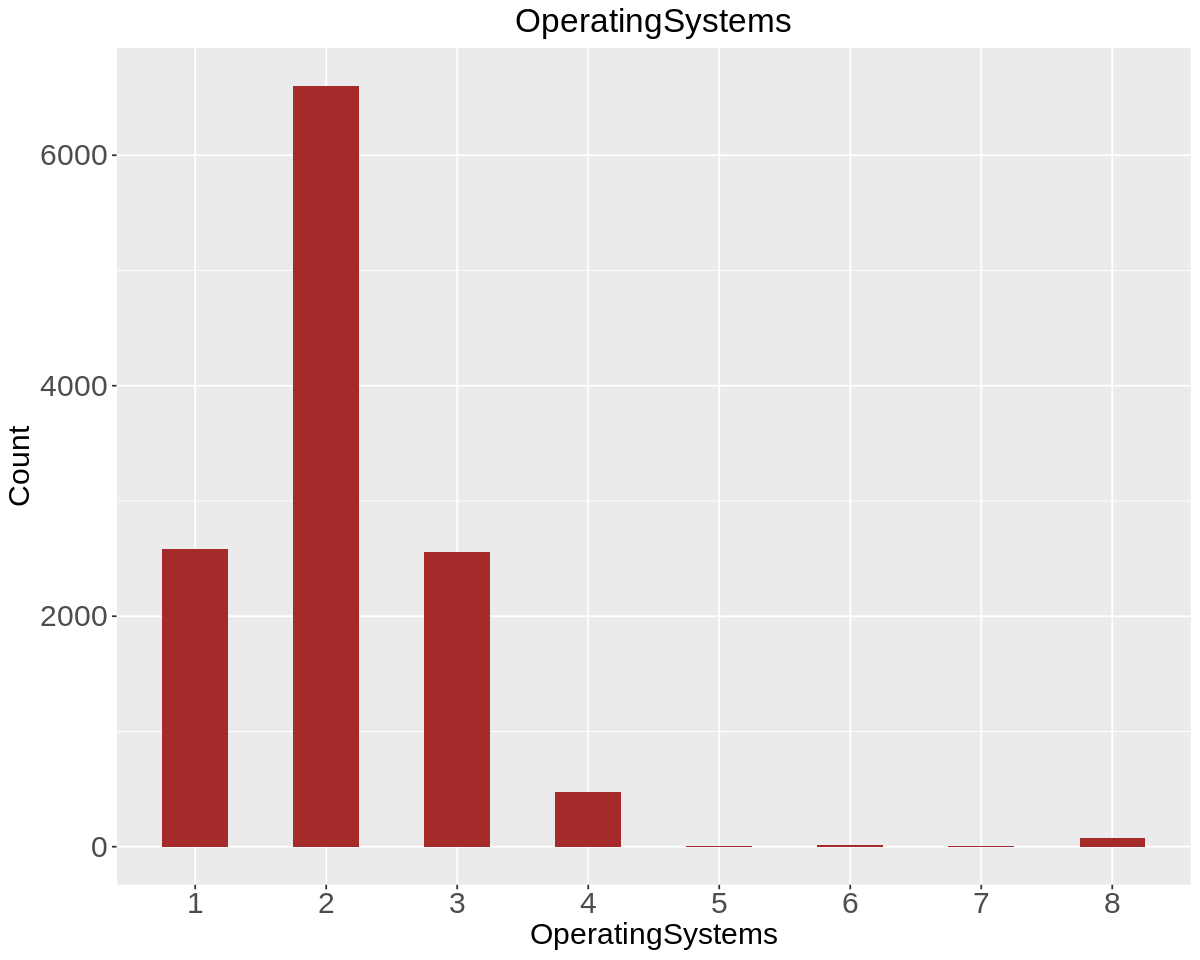

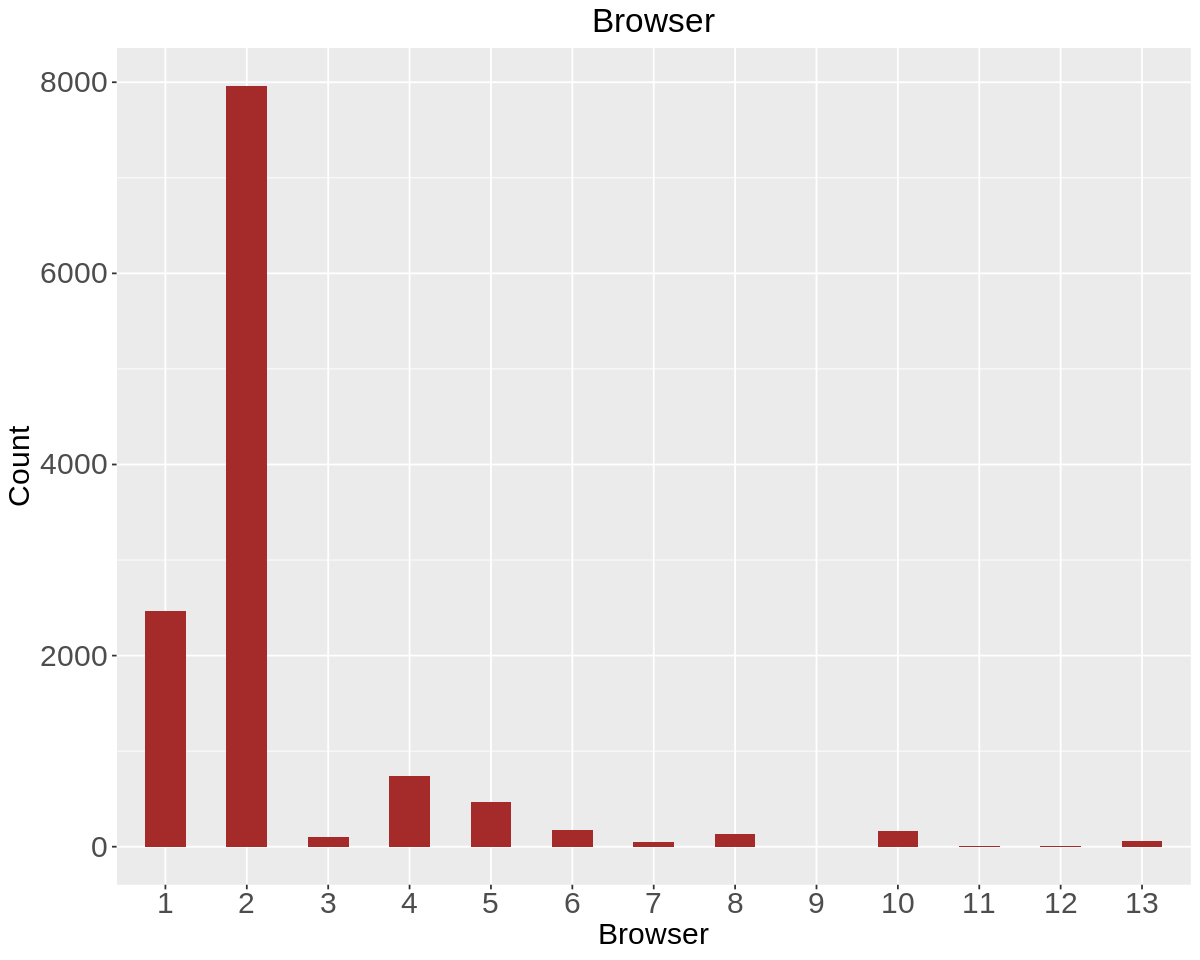

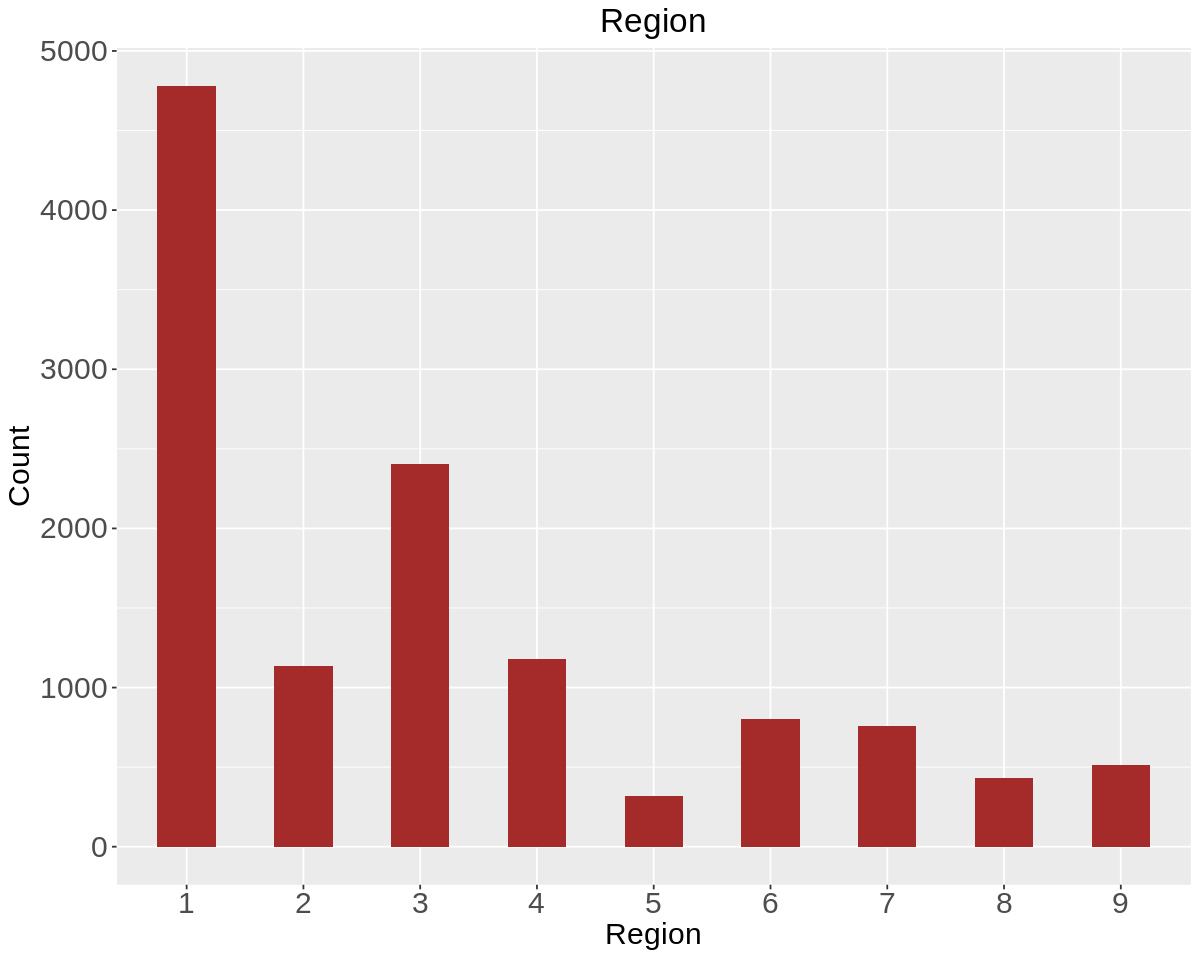

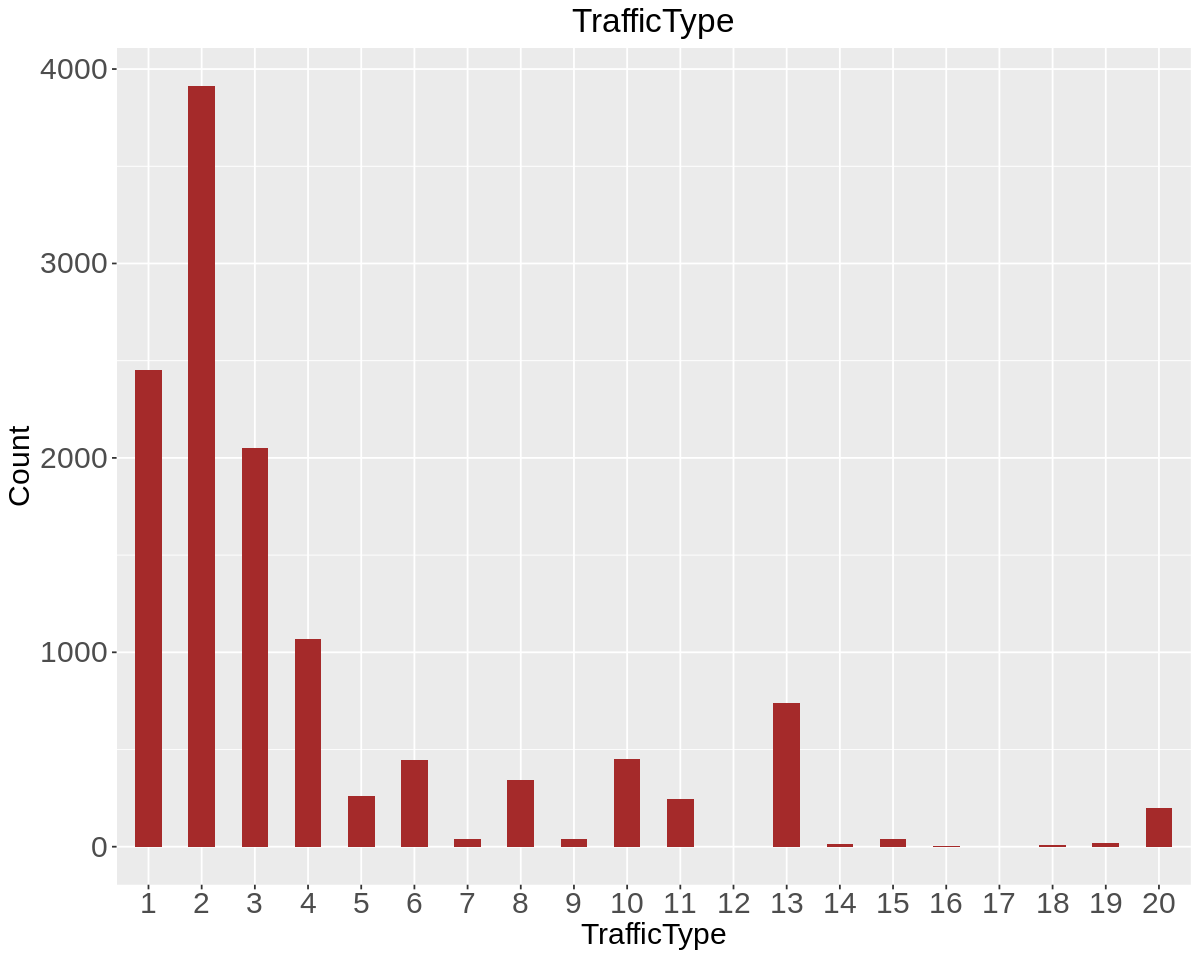

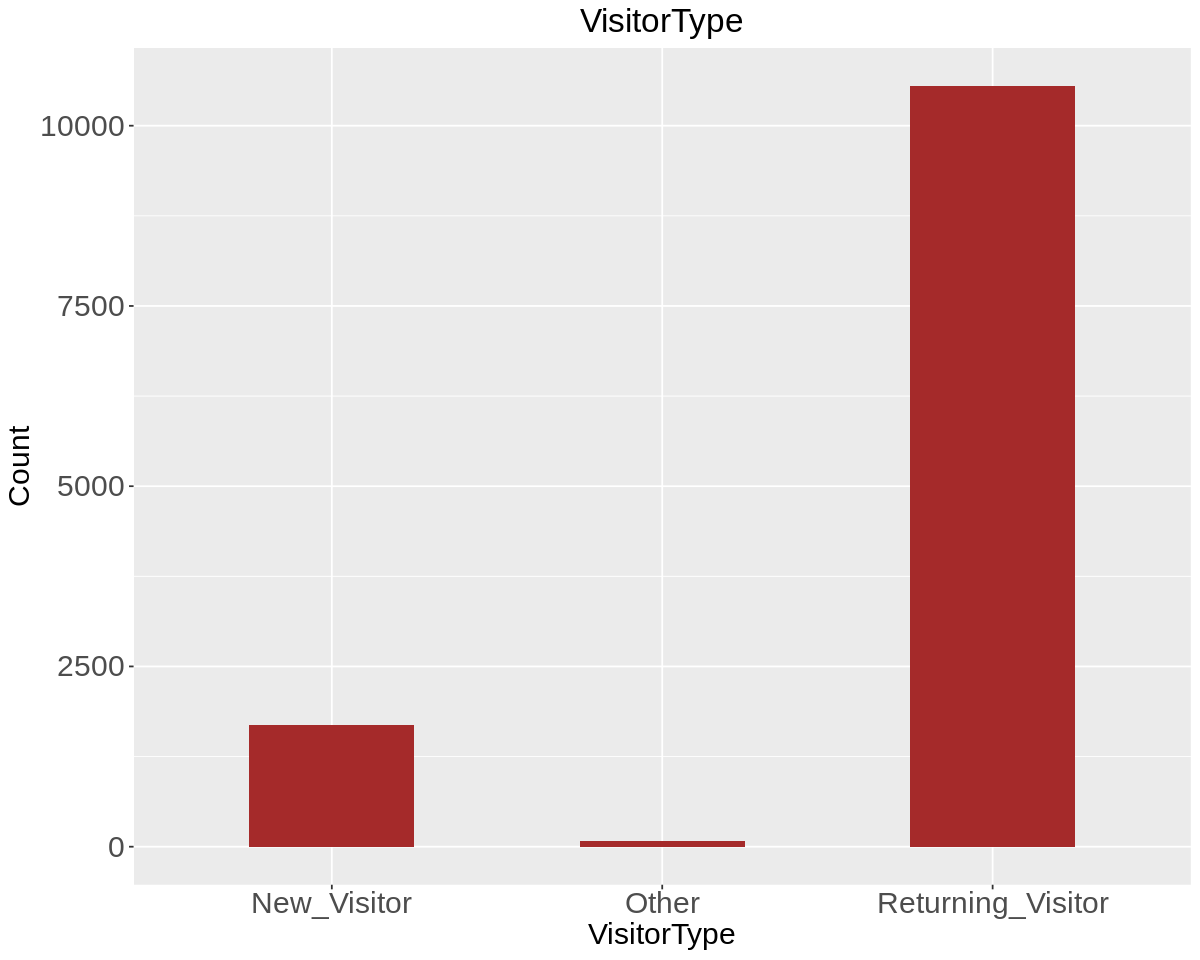

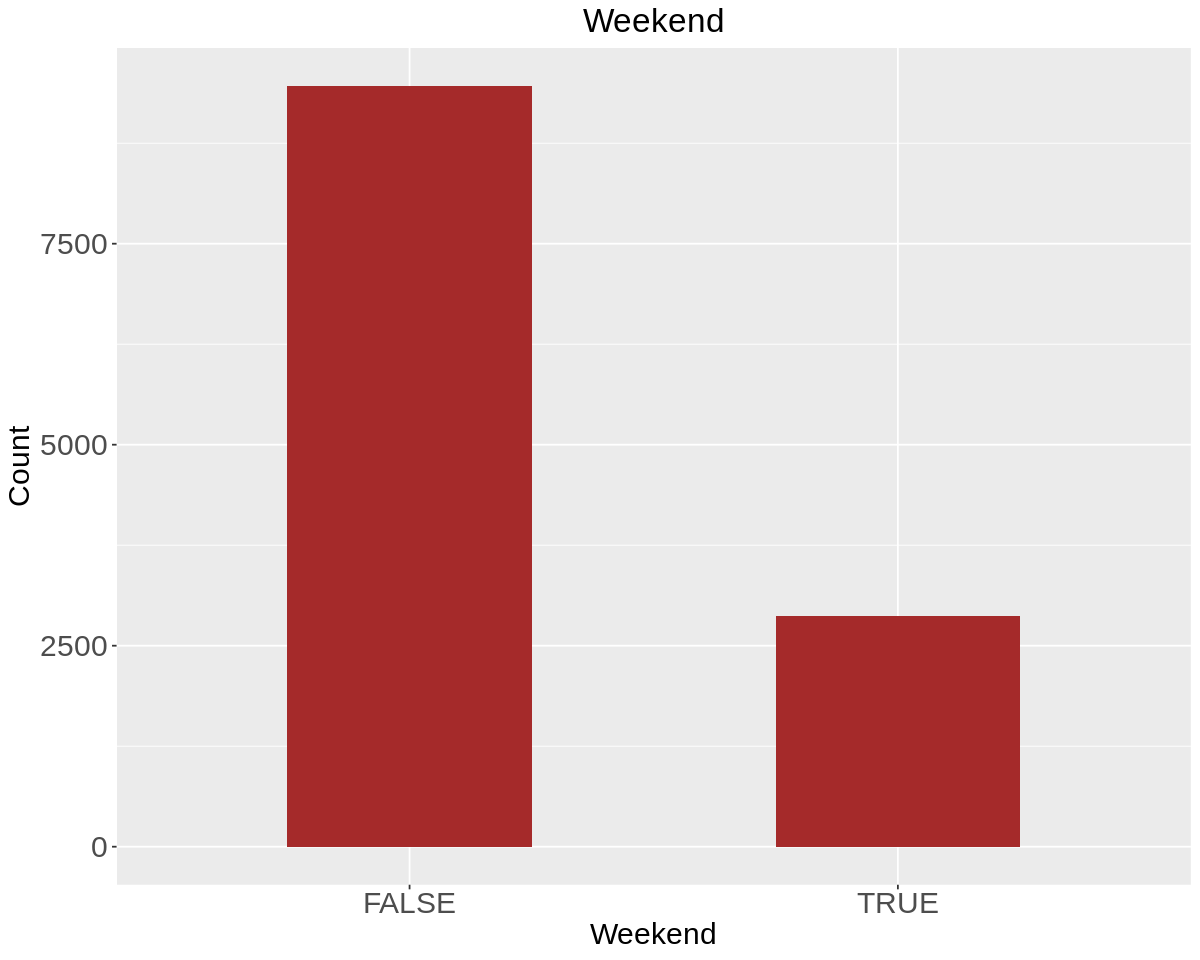

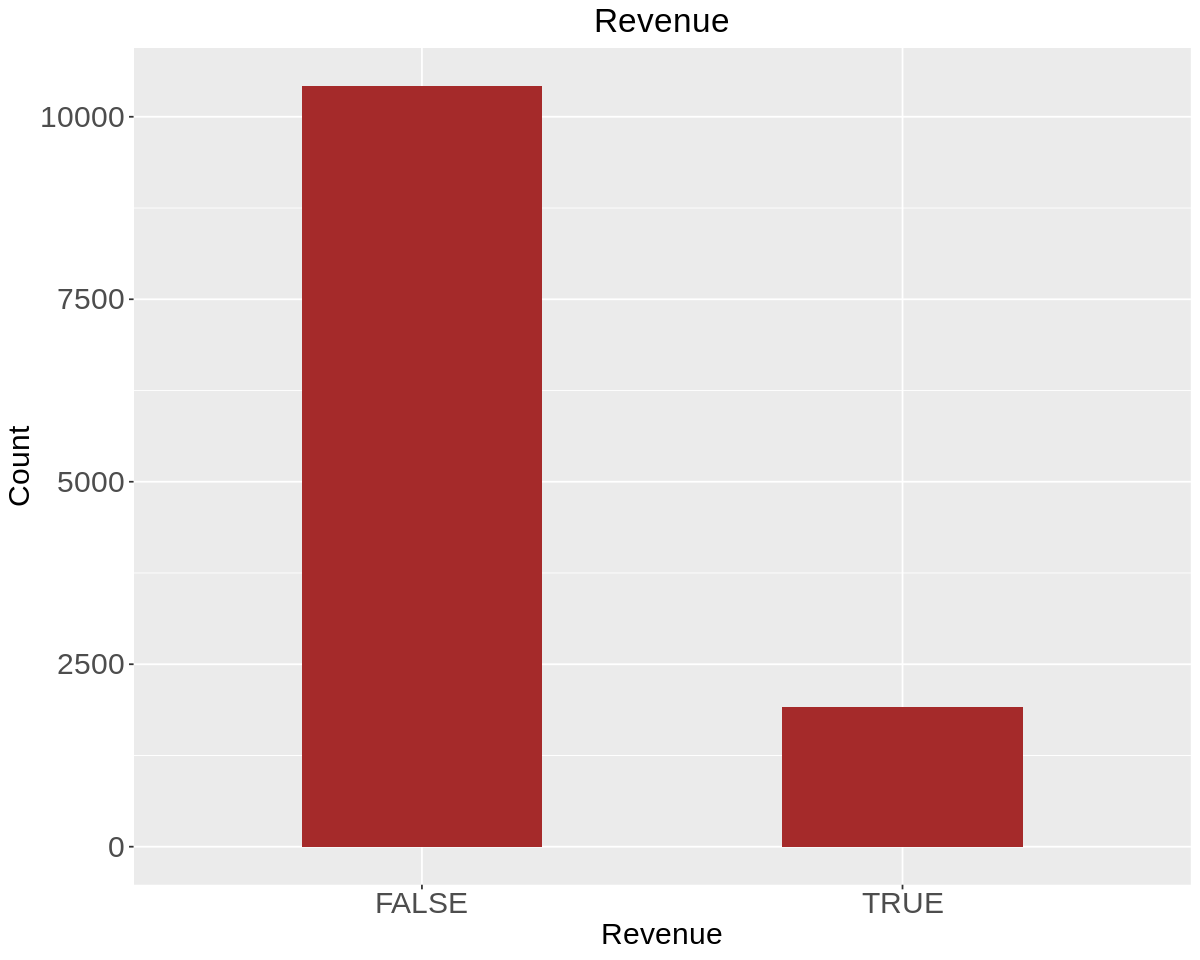

In [168]:
#Analysis of the Categorical Variables 
for (i in 1:length(cat)) {
  options(repr.plot.width = 10, repr.plot.height = 8)
  print(ggplot(cat, aes(x = factor(cat[,i]))) +
  geom_bar(fill = "brown", width = 0.5) +
  labs(title = names(cat[i]), x = names(cat[i]), y = "Count") +
  theme(axis.text = element_text(size=18),
        axis.title = element_text(size = 18),
        plot.title = element_text(hjust = 0.5, size = 20)))
  cat("\n", "\n")
}

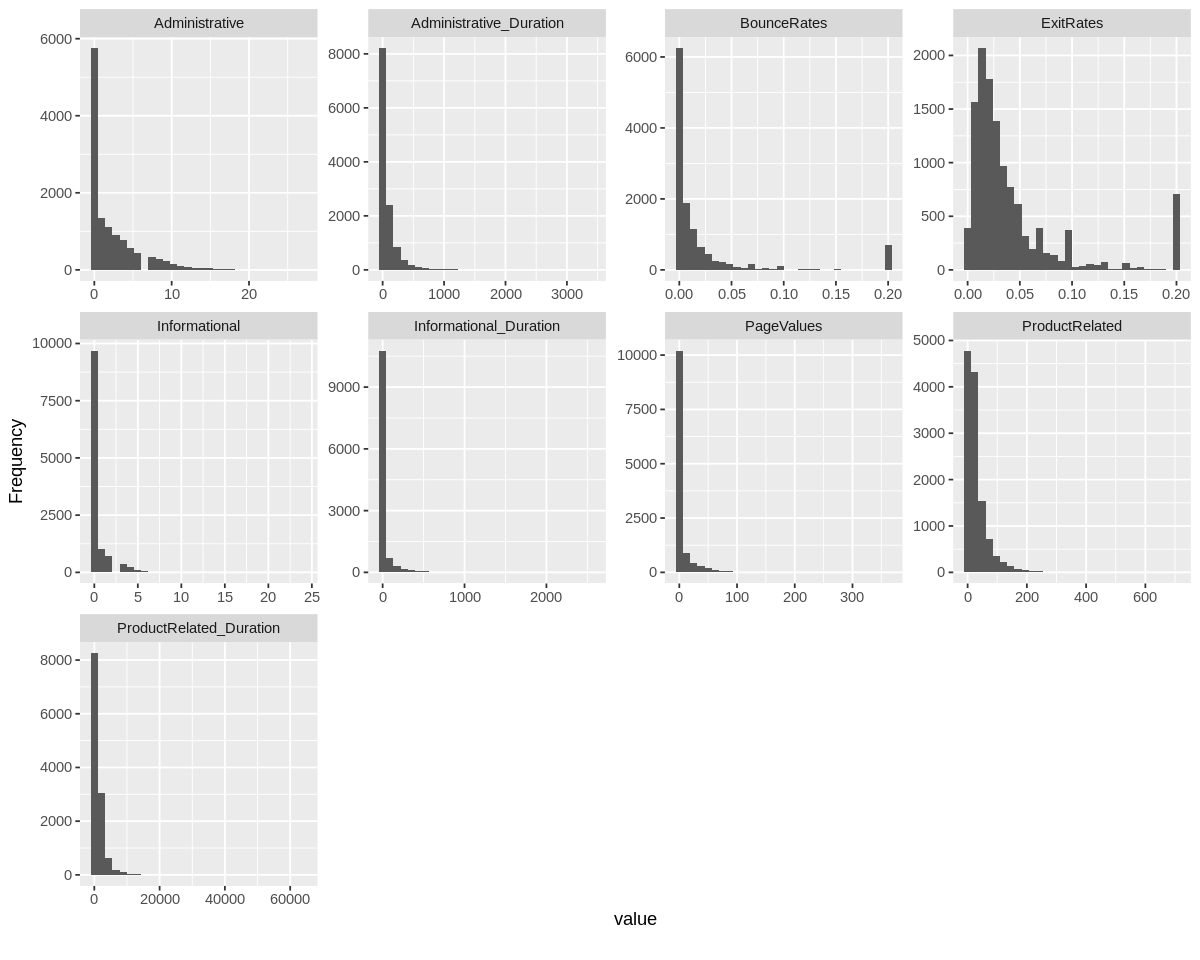

In [169]:
#Histogram of numerical variables in the dataset
plot_histogram(numerical)

# **Bivariate Analysis**

In [170]:
install.packages("ggcorrplot")
library(ggcorrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



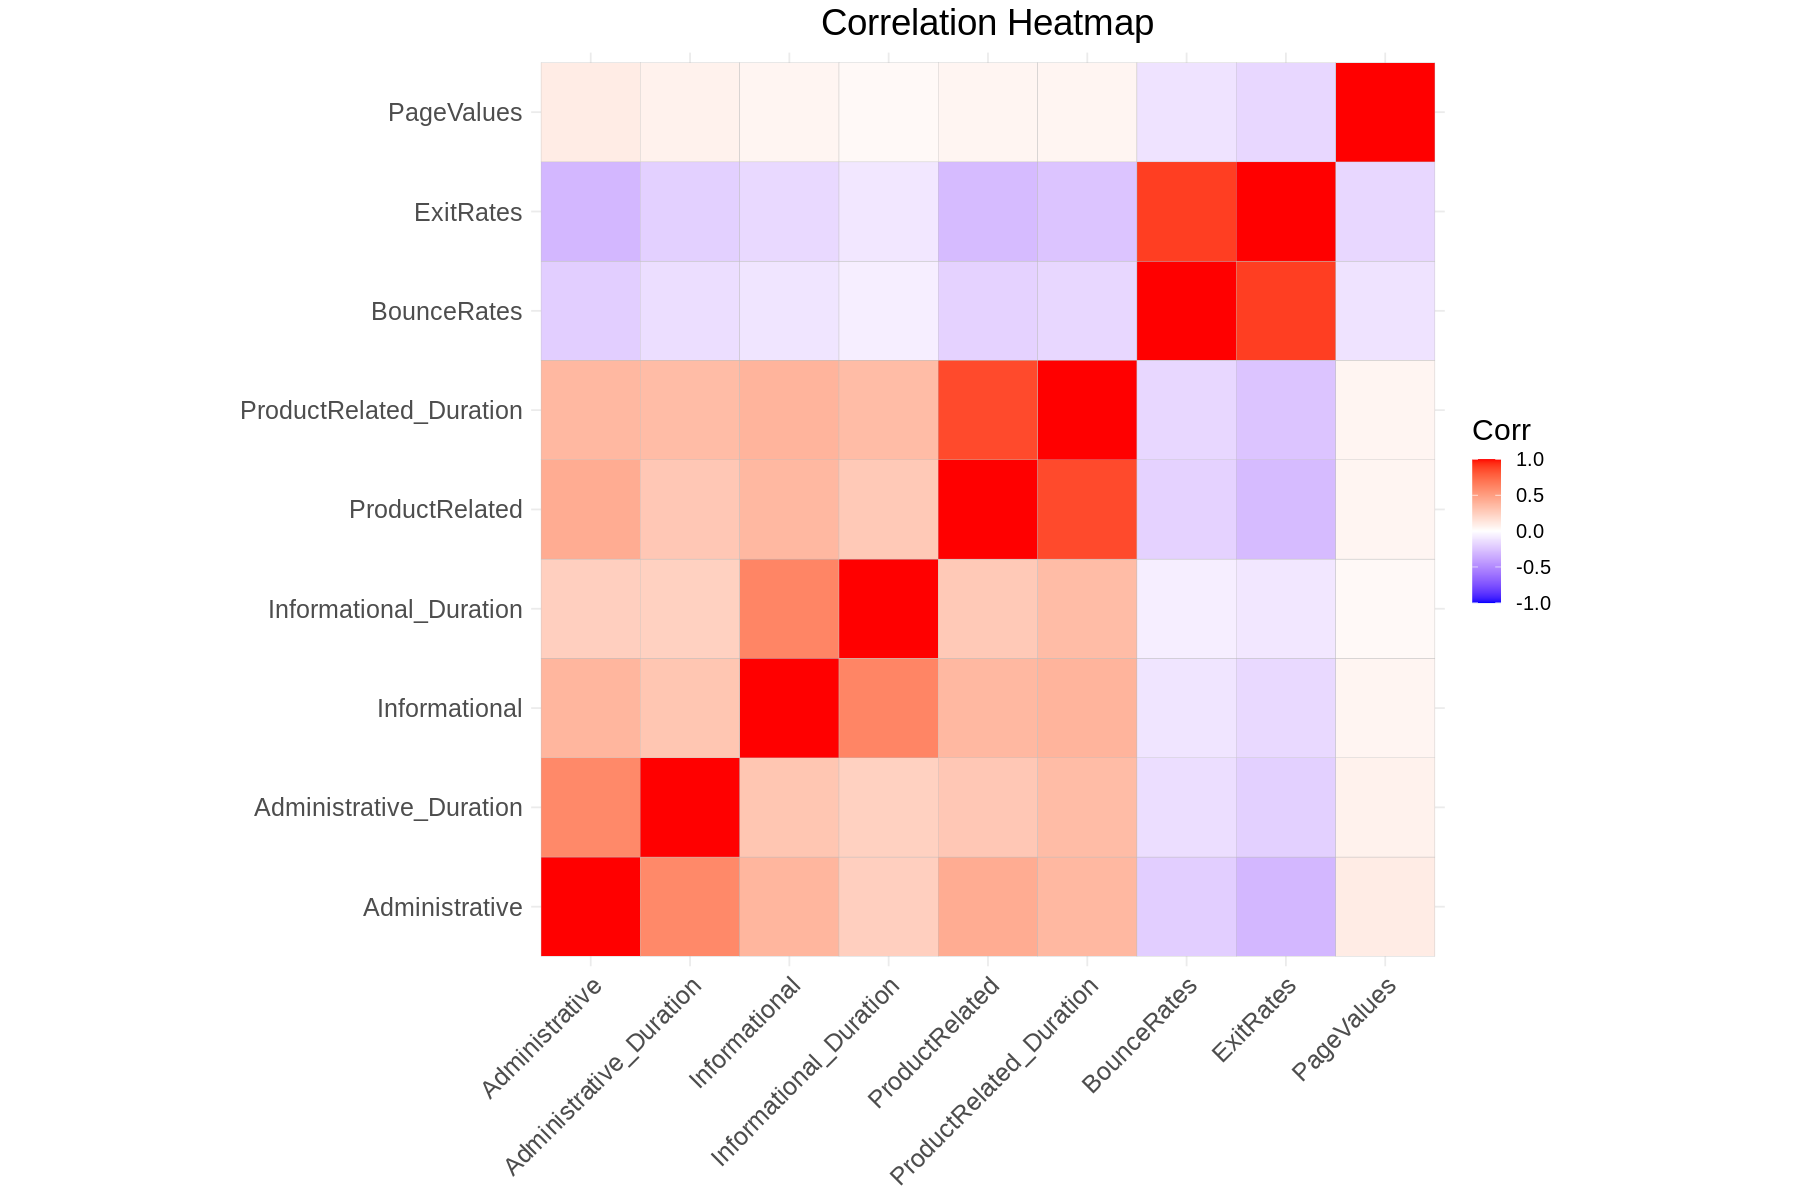

In [171]:
#Corrlation Heatmap
options(repr.plot.width = 15, repr.plot.height = 10)
ggcorrplot(cor(kira[, 1:9]), tl.cex = 15) + 
  labs(title = "Correlation Heatmap") +
    theme(axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22),
          legend.title = element_text(size=18),
          legend.text = element_text(size=12))

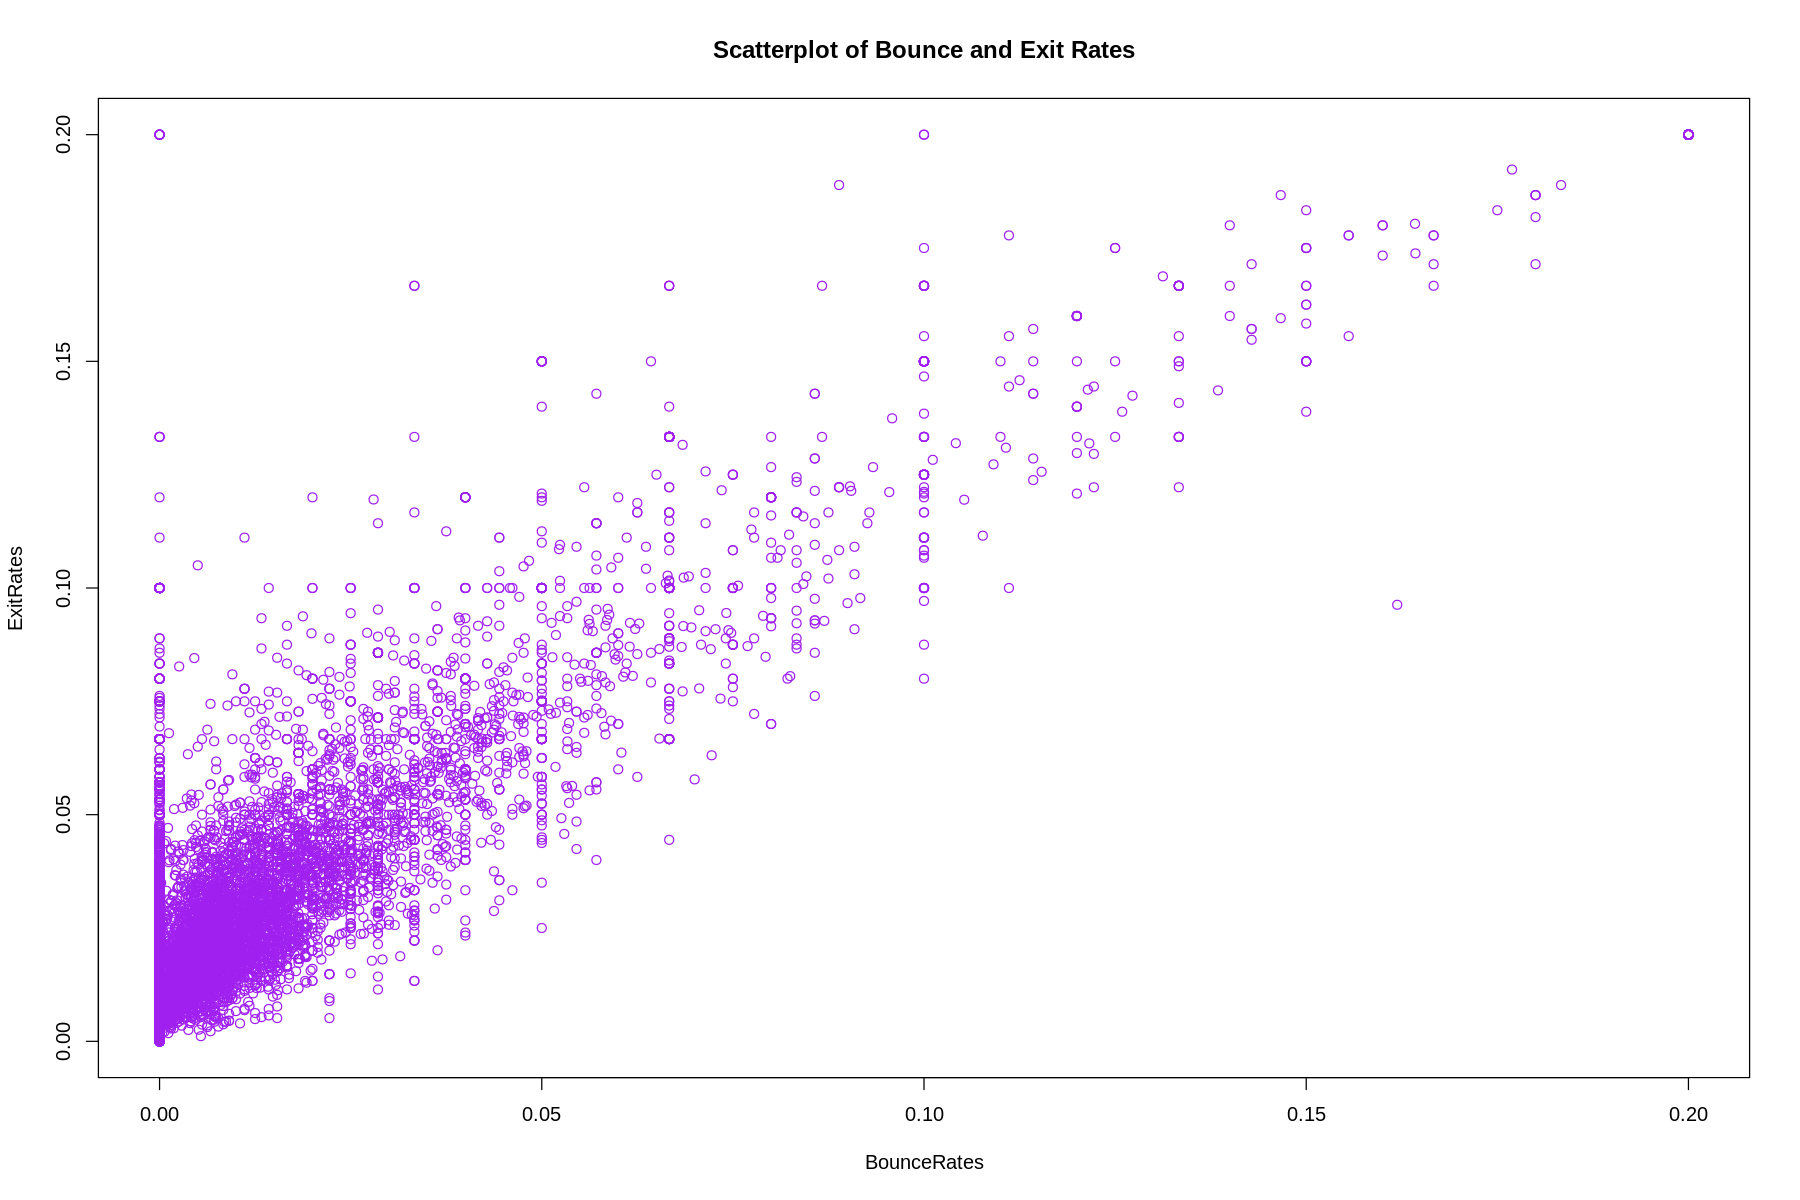

In [172]:
#Scatter Plot of Bounce and Exit Rates 
plot(ExitRates ~ BounceRates, dat = kira, 
      col = "purple",
      main = "Scatterplot of Bounce and Exit Rates")

# **Modelling**

# **K-Means Clustering**